<a href="https://colab.research.google.com/github/jmacedo91/Studying-ISLP/blob/main/Chapter_3_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An Introduction to Statistical Learning

# Chapter 3 - Linear Regression


##3.1 Simple Linear Regression

*Simple linear regression* lives up to its name: it is a very straightforward approach for predicting a quantitative response $Y$ on the basis of a single predictor variable $X$. It assumes that there is approximately a linear
relationship between $X$ and $Y$ . Mathematically, we can write this linear
relationship as

\begin{equation}
Y \approx \beta_{0} + \beta_{1} \ X \ (3.1)
\end{equation}

You might read “$\approx$” as “is approximately modeled as”. We will sometimes
describe (3.1) by saying that we are regressing Y on X (or Y onto X).

In Equation 3.1, $\beta_{0}$ and $\beta_{1}$ are two unknown constants that represent the *intercept* and *slope* terms in the linear model. Together, $\beta_{0}$ and $\beta_{1}$ are known as the model coefcients or parameters. Once we have used our training data to produce estimates $\hat\beta_{0}$ and $\hat\beta_{1}$ for the model coefcients, we can predict future sales on the basis of a particular value of TV advertising by computing

$$\hat y = \hat\beta_{0} + \hat\beta_{1}x \ (3.2)$$

where $\hat y$ indicates a prediction of Y on the basis of $X = x$. Here we use a hat symbol, ˆ , to denote the estimated value for an unknown parameter or coefficient, or to denote the predicted value of the response.

###3.1.1 Estimating the Coefficients

In practice, $\beta_{0}$ and $\beta_{1}$ are unknown. So before we can use (3.1) to make predictions, we must use data to estimate the coefficients. Let

$$(x_{1},y_{1}), (x_{2},y_{2}),..., (x_{n},y_{n})$$

represent $n$ observation pairs, each of which consists of a measurement of
X and a measurement of Y . In the **Advertising** example, this data set consists of the TV advertising budget and product sales in n = 200 diferent
markets. (Recall that the data are displayed in Figure 2.1.) Our goal is to
obtain coefficient estimates $\beta_{0}$ and $\beta_{1}$ such that the linear model (3.1) fits the available data well—that is, so that $y_{i} ≈ \beta_{0} + \beta_{1}x_{i}$ for $i$ = 1,...,$n$. In other words, we want to fnd an intercept $\beta_{0}$ and a slope $\beta_{1}$ such that the resulting line is as close as possible to the n = 200 data points. There are a number of ways of measuring closeness. However, by far the most common approach involves minimizing the least squares criterion, and we take least squares that approach in this chapter. Alternative approaches will be considered in Chapter 6

Let $\hat y = \hat\beta_{0} + \hat\beta_{1}x$ be the prediction for $Y$ based on the $i$th value of $X$. Then $e_{i} = y_{i} -\hat y_{i}$ represents the $i$th $residual$—this is the diference between the $i$th observed response value and the $i$th response value that is predicted by our linear model. We define the *residual sum of squares* (RSS) as

$$ RSS = e_{1}^2+e_{2}^2+...+e_{n}^2,$$ or equivalently as
$$ RSS = (y_{1} - \hat\beta_{0} - \hat\beta_{1}x_{1})^2 + (y_{2} - \hat\beta_{0} - \hat\beta_{1}x_{2})^2 + ... +(y_{n} - \hat\beta_{0} - \hat\beta_{1}x_{n})^2 \ (3.3)$$

The least squares approach chooses $\hat\beta_{0}$ and $\hat\beta_{1}$ to minimize the RSS. Using some calculus, one can show that the minimizers are

$$\hat\beta_{1} = \frac{\sum_{i=1}^n(x_{i} - \bar{x})(y_{i} - \bar{y})}{\sum_{i=1}^n(x_{i} - \bar{x})^2}$$

$$\hat\beta_{0} = \bar{y} - \hat\beta_{1}\bar{x} \ (3.4)$$



where $\hat y ≡ \frac{1}{n} \sum_{i=1}^n y_{i}$ and $\hat x ≡ \frac{1}{n} \sum_{i=1}^n x_{i}$ are the sample means. In other words, (3.4) defines the <font color='red'>*least squares coefficient estimates*</font> for simple linear regression.

In [1]:
#Data Analysis
import pandas as pd
import numpy as np
import statsmodels.api as sm

#Data Visualization
import seaborn as sns
sns.set_theme(style='whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('figure', figsize = (6, 4))

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Advertising.csv to Advertising (2).csv


In [3]:
advertising = pd.read_csv('Advertising.csv', index_col='Unnamed: 0')

In [4]:
advertising.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


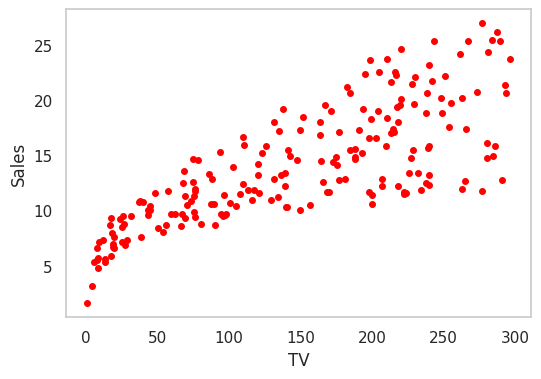

In [5]:
plt.scatter(x=advertising['TV'], y=advertising['sales'], c='red', s=16)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.grid(False)

In [6]:
def estimating_coefficients(x, y):
  x_mean = np.mean(x)
  y_mean = np.mean(y)

  numerator = np.sum((x - x_mean) * (y - y_mean))
  denominator = np.sum((x - x_mean) ** 2)

  beta_1 = numerator/denominator
  beta_0 = y_mean - (beta_1 * x_mean)

  return (beta_1, beta_0)

In [7]:
beta_1, beta_0 = estimating_coefficients(x=advertising['TV'], y=advertising['sales'])

In [8]:
print(f"The slope coefficient is: {round(beta_1, 4)}")
print(f"The intercept coefficient is: {round(beta_0, 2)}")

The slope coefficient is: 0.0475
The intercept coefficient is: 7.03


In [9]:
def plot_linear_regression(x, y, x_label, y_label):
  x_mean = np.mean(x)
  y_mean = np.mean(y)

  numerator = np.sum((x - x_mean) * (y - y_mean))
  denominator = np.sum((x - x_mean) ** 2)

  beta_1 = numerator/denominator
  beta_0 = y_mean - (beta_1 * x_mean)

  y_predicted = beta_0 + beta_1*x

  plt.scatter(x=x, y=y, c='red', s=12)
  plt.plot(x, y_predicted, color='blue')
  plt.title('Figure 3.1')
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.grid(False)

  plt.vlines(x=x, ymin=y, ymax=y_predicted, colors='gray', linewidth=1, linestyle='--')
  plt.legend(['Data','Least Squares Fit','Residuals'])
  plt.show()

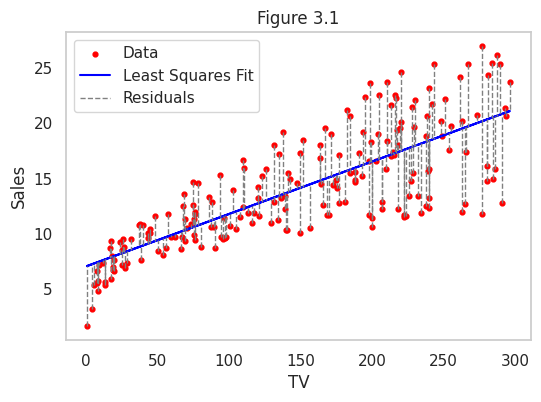

In [10]:
plot_linear_regression(x=advertising['TV'], y=advertising['sales'], x_label='TV', y_label='Sales')

***
**FIGURE 3.1.** *For the <font color='orange'>Advertising</font> data, the least squares fit for the regression of <font color='orange'>sales</font> onto <font color='orange'>TV</font> is shown. The fit is found by minimizing the residual sum of squares. Each grey line segment represents a residual. In this case a linear fit captures the essence of the relationship, although it overestimates the trend in the left of the plot.*
***

Figure 3.1 displays the simple linear regression ft to the Advertising data, where $\hat\beta_{0}$ = 7.03 and $\hat\beta_{1}$ = 0.0475. In other words, according to this approximation, an additional \$1,000 spent on TV advertising is associated with selling approximately 47.5 additional units of the product. In Figure 3.2, we have computed RSS for a number of values of $\beta_{0}$ and $\beta_{1}$, using the advertising data with sales as the response and TV as the predictor. In each plot, the red dot represents the pair of least squares estimates ($\hat\beta_{0}$, $\hat\beta_{1}$) given by (3.4). These values clearly minimize the RSS.

### 3.1.2 Assessing the Accuracy of the Coefficient Estimates

Recall from (2.1) that we assume that the true relationship between $X$ and
$Y$ takes the form $Y = f(X) + ϵ$ for some unknown function $f$, where "$ϵ$"
is a mean-zero random error term. If $f$ is to be approximated by a linear
function, then we can write this relationship as

\begin{equation}
Y = \beta_{0} + \beta_{1} \ X + \epsilon
\end{equation}

Here $\beta_{0}$ is the intercept term—that is, the expected value of $Y$ when $X = 0$, and $\beta_{1}$ is the slope—the average increase in $Y$ associated with a one-unit increase in $X$. The error term is a catch-all for what we miss with this simple model: the true relationship is probably not linear, there may be other variables that cause variation in $Y$, and there may be measurement
error. We typically assume that the error term is independent of $X$.

In [11]:
# Disponível https://matteocourthoud.github.io/course/ml-econ/01_regression/
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression

X = scale(advertising['TV'], with_mean=True, with_std=False).reshape(-1, 1)
y = advertising['sales']
regr = LinearRegression().fit(X,y)

# Create grid coordinates for plotting
B0 = np.linspace(regr.intercept_-2, regr.intercept_+2, 50)
B1 = np.linspace(regr.coef_-0.02, regr.coef_+0.02, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size, B1.size))

# Calculate Z-values (RSS) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] =((y - (xx[i,j]+X.ravel()*yy[i,j]))**2).sum()/1000

# Minimized RSS
min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'
min_rss = np.sum((regr.intercept_+regr.coef_*X - y.values.reshape(-1,1))**2)/1000
min_rss

2.1025305831313514

In [12]:
# Figure 3.2 - Regression coefficients - RSS
def make_fig_3_2():
    fig = plt.figure(figsize=(15,6))
    fig.suptitle('RSS - Regression coefficients')

    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122, projection='3d')

    # Left plot
    CS = ax1.contour(xx, yy, Z, cmap=plt.cm.Set1, levels=[2.15, 2.2, 2.3, 2.5, 3])
    ax1.scatter(regr.intercept_, regr.coef_[0], c='r', label=min_RSS)
    ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')

    # Right plot
    ax2.plot_surface(xx, yy, Z, rstride=3, cstride=3, alpha=0.3)
    ax2.contour(xx, yy, Z, zdir='z', offset=Z.min(), cmap=plt.cm.Set1,
                alpha=0.4, levels=[2.15, 2.2, 2.3, 2.5, 3])
    ax2.scatter3D(regr.intercept_, regr.coef_[0], min_rss, c='r', label=min_RSS)
    ax2.set_zlabel('RSS')
    ax2.set_zlim(Z.min(),Z.max())
    ax2.set_ylim(0.02,0.07)

    # settings common to both plots
    for ax in fig.axes:
        ax.set_xlabel(r'$\beta_0$')
        ax.set_ylabel(r'$\beta_1$')
        ax.set_yticks([0.03,0.04,0.05,0.06])
        ax.legend()

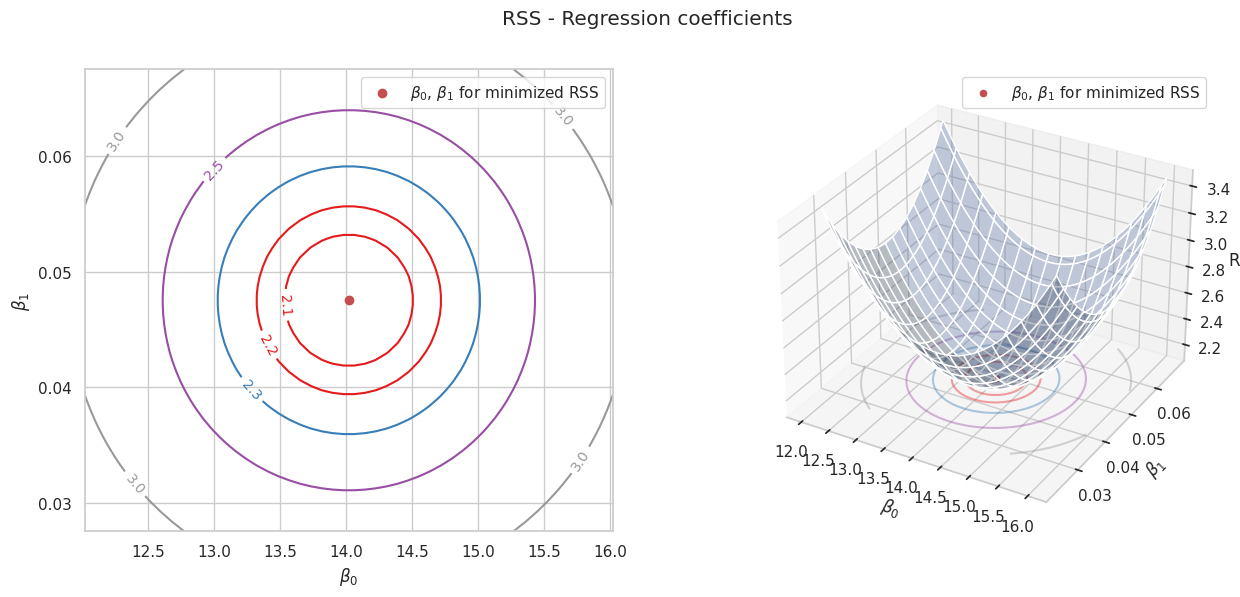

In [13]:
make_fig_3_2()

***
FIGURE 3.2. *Contour and three-dimensional plots of the RSS on the
<font color="orange">Advertising</font> data, using <font color="orange">sales</font> as the response and <font color="orange">TV</font> as the predictor. The red dots correspond to the least squares estimates $\hat\beta_{0}$ and $\hat\beta_{1}$, given by (3.4).*
***